## Project 6: Exploratory Data Analysis
**Date**: 9/30/2024
**Author**: Trent Rueckert

This purpose of this project is to do exploratory data analysis (EDA) on the car_crashes dataset

### Import Dependencies


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

### 1. Data Acquisition

In [2]:
# Load the dataset into a pandas DataFrame
df = sns.load_dataset('car_crashes')

# Inspect first rows of the DataFrame
print(df.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


### 2. Initial Data Inspections

In [3]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   
5   13.6     5.032    3.808          10.744       12.920       835.50   
6   10.8     4.968    3.888           9.396        8.856      1068.73   
7   16.2     6.156    4.860          14.094       16.038      1137.87   
8    5.9     2.006    1.593           5.900        5.900      1273.89   
9   17.9     3.759    5.191          16.468       16.826      1160.13   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  
5      139.91     CO  
6      167.02     CT  
7      151.4

### Step 3. Initial Descriptive Statistics

In [4]:
print(df.describe())

           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747   1.729133        4.508977     3.764672   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12.750000   3.766500   3.894000       10.478000    11.348000   
50%    15.600000   4.608000   4.554000       13.857000    13.775000   
75%    18.500000   6.439000   5.604000       16.140000    16.755000   
max    23.900000   9.450000  10.038000       23.661000    21.280000   

       ins_premium  ins_losses  
count    51.000000   51.000000  
mean    886.957647  134.493137  
std     178.296285   24.835922  
min     641.960000   82.750000  
25%     768.430000  114.645000  
50%     858.970000  136.050000  
75%    1007.945000  151.870000  
max    1301.520000  194.780000  


### Step 4. Initial Data Distribution for Numerical Columns

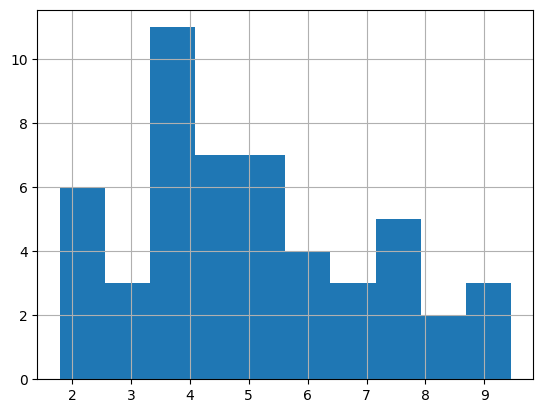

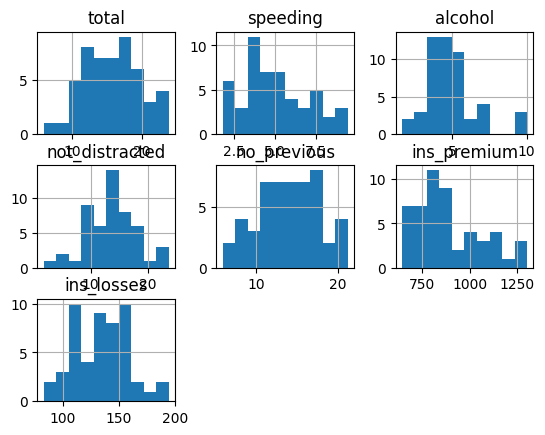

In [5]:
# Inspect histogram by numerical column
df['speeding'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

The speeding histogram is skewed to the right, but the rest of the non-insurance related histograms are relatively bell curve shaped. The insurance premium shape is also skewed right, but the insurance losses shape is fairly symmetrical.

### Step 5. Initial Data Distribution for Categorical Columns

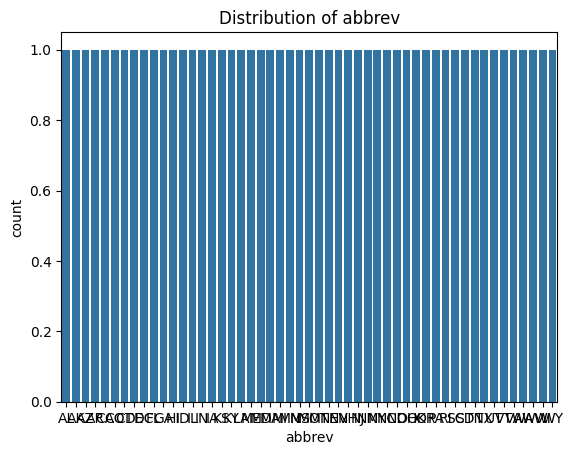

In [6]:
# Inspect value counts by categorical column
df['abbrev'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

There is only one categorical column in the dataset and it is state abbreviation. Each value is one because it is organized by state also including Washington D.C.

### Step 6. Initial Data Transformation and Feature Engineering

In [7]:
# Renaming the state abbrevation column
df.rename(columns={'abbrev': 'state'}, inplace=True)

# Adding a distracted driving column
df['distracted'] = df['total'] - df['not_distracted']

# Check the changes
print(df[df.columns[7:]])

   state  distracted
0     AL       0.752
1     AK       1.810
2     AZ       2.976
3     AR       1.344
4     CA       1.080
5     CO       2.856
6     CT       1.404
7     DE       2.106
8     DC       0.000
9     FL       1.432
10    GA       0.780
11    HI       3.150
12    ID       2.295
13    IL       0.768
14    IN       0.725
15    IA       0.471
16    KS       4.094
17    KY       4.708
18    LA       5.535
19    ME       1.963
20    MD       3.625
21    MA       1.066
22    MI       0.705
23    MN       1.152
24    MS      15.840
25    MO       1.288
26    MT       3.424
27    NE       1.043
28    NV       0.735
29    NH       1.508
30    NJ       1.568
31    NM       6.072
32    NY       1.476
33    NC       1.008
34    ND       0.239
35    OH       0.141
36    OK       1.592
37    OR       4.224
38    PA       0.728
39    RI       0.888
40    SC       0.956
41    SD       0.388
42    TN       3.510
43    TX       1.746
44    UT       1.356
45    VT       0.544
46    VA     

### Step 7. Initial Visualizations

#### Subsection 1: Relationships Pairplot

Goal: Show relationships between different attributes among different states

Chart type: Pairplot

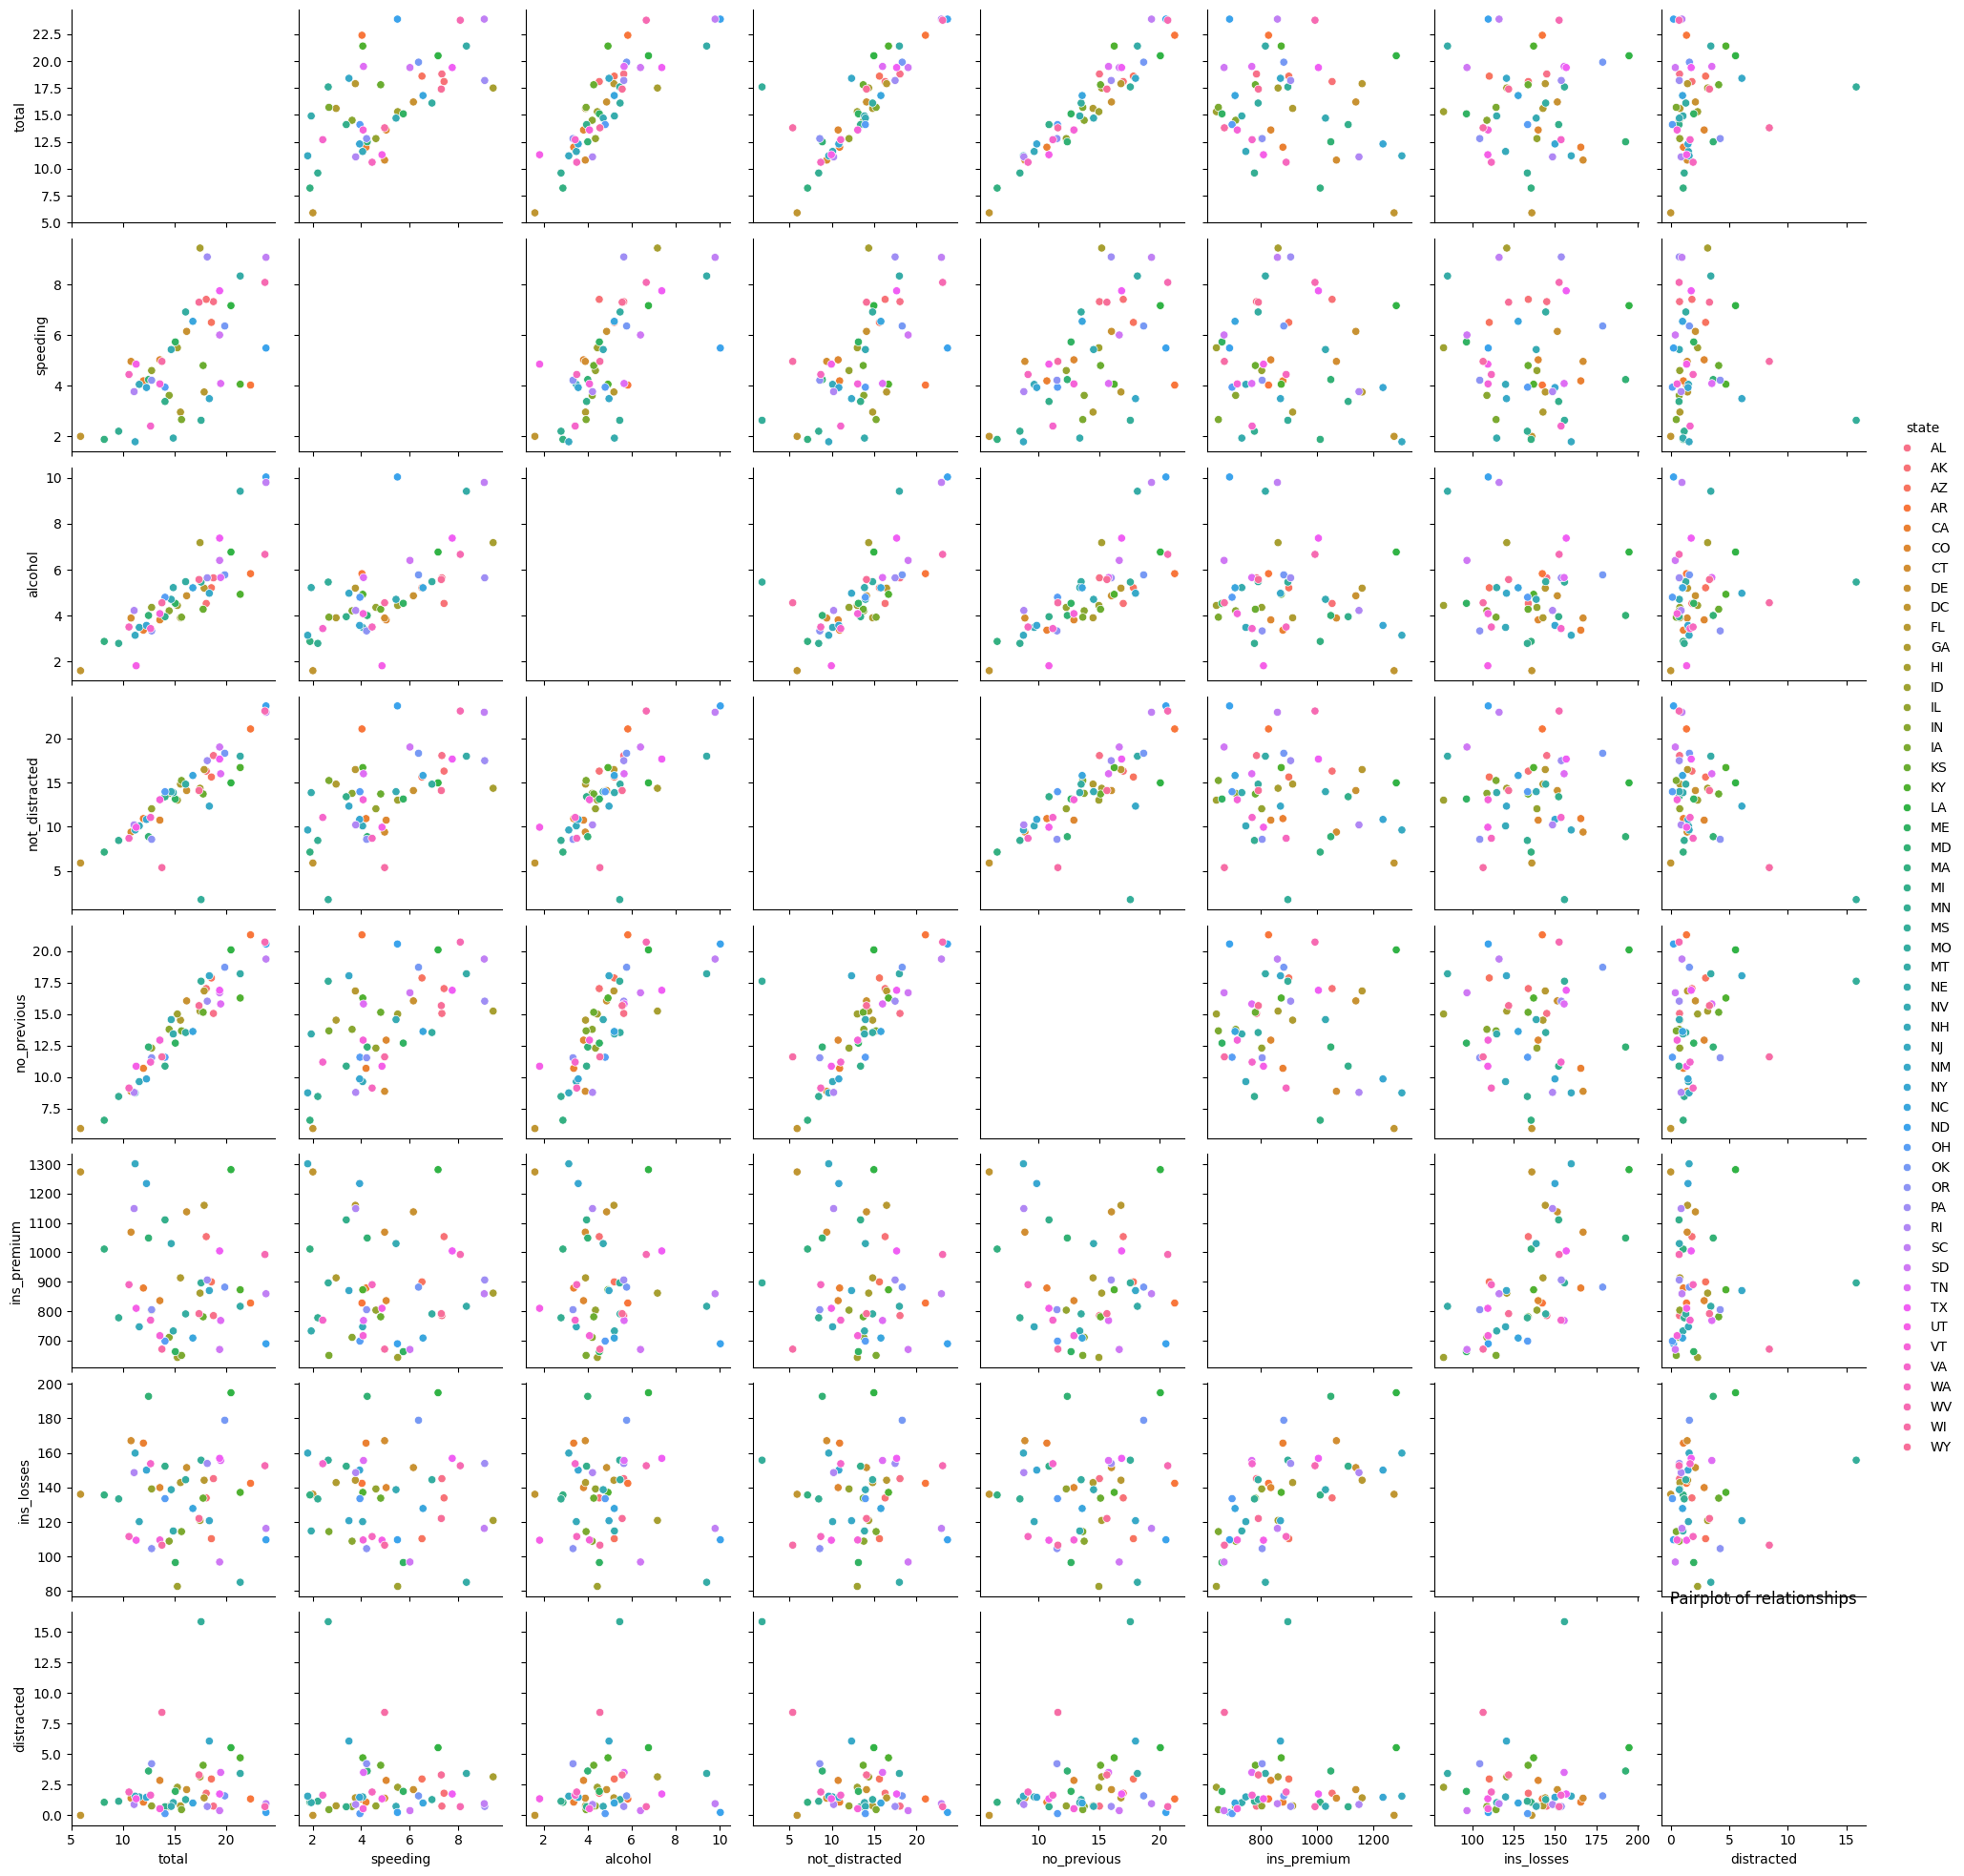

In [8]:
sns.pairplot(df, hue='state')
plt.title('Pairplot of relationships')
plt.show()

Story: The pairplot shows some positive correlation between attributes like no previous crashes/not being distracted and alcohol/no previous crashes for example. It is tough to see very much comparison between the states, but there are some clear outliers in many areas. 

#### Subsection 2: Insurance Scatter Plot

Goal: Look specifially into the relationship between the state by state insurance premium vs. the insurance losses

Chart type: Scatterplot

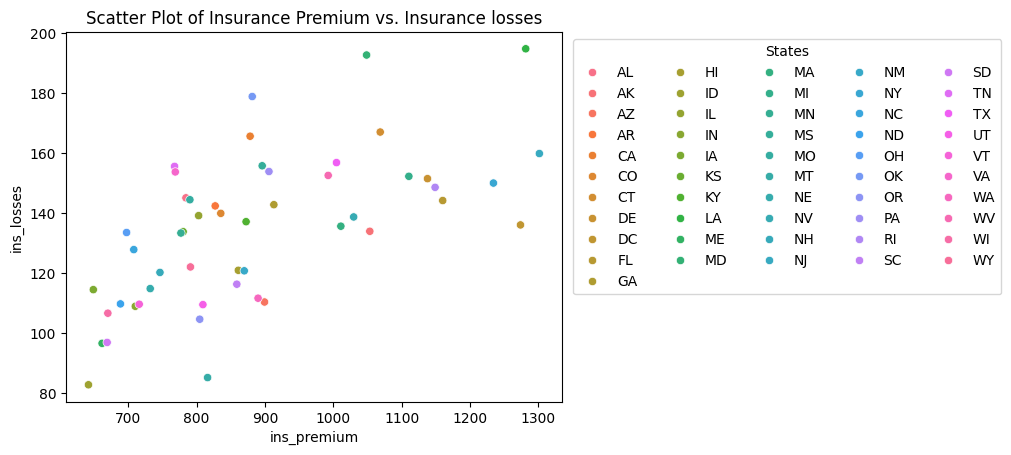

In [28]:
sns.scatterplot(data=df, x='ins_premium', y='ins_losses', hue='state')
plt.title('Scatter Plot of Insurance Premium vs. Insurance losses')
plt.legend(title='States', bbox_to_anchor=(1.9, 1), loc='upper right', ncol=5)
plt.show()

Story: At first, the losses seems to increase quickly as the premium increases, but then this trend tapes off around 140-160 dollars in losses. There are some outliers showing a high loss with a not very high premium, a very low loss amount, a very low loss amount with a not so low premium, and a very high premmium with an average amount of loss. Overall, insurance premium and insurance loss are positively correlated. 

#### Subsection 3: Alcohol and Speeding Related Car Crashes Histograms

Goal: Compare the frequency of alcohol and speeding related crashes

Chart type: Histograms

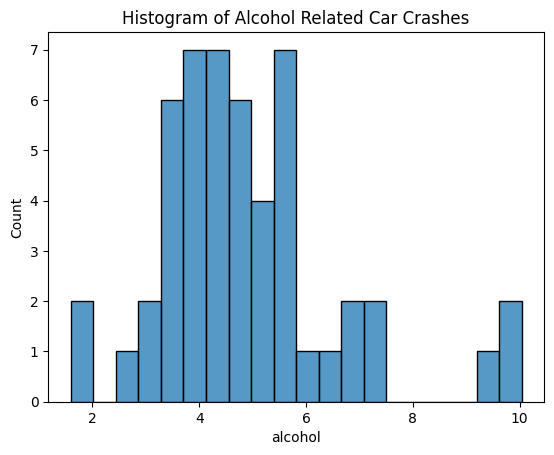

In [15]:
sns.histplot(df['alcohol'], bins=20)
plt.title('Histogram of Alcohol Related Car Crashes')
plt.show()

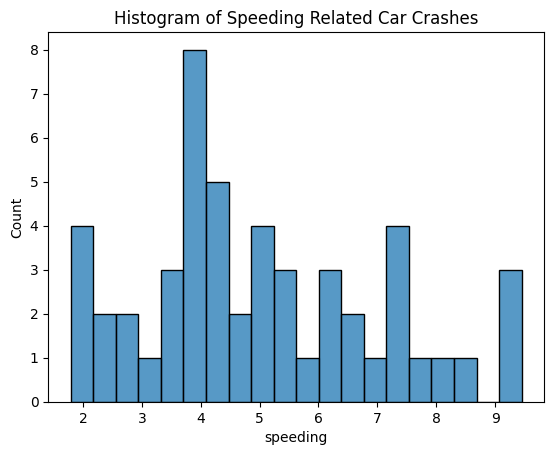

In [29]:
sns.histplot(df['speeding'], bins=20)
plt.title('Histogram of Speeding Related Car Crashes')
plt.show()

Story: The distributions of the two are a bit different: the alcohol related crashes histogram is more roughly symmetrical and the speeding related crashes histogram is skewed right. More states have speeding involved in their crashes than alcohol. 

### 9. Conclusion

There are many factors that go into a car crash, but this EDA investigated the main reasons behind one through the use of various visualizations of relationships within the datset. 